In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np 

In [2]:
df = pd.read_csv("2_cleaned_data.csv")

In [3]:
df.sample(10)

,age,gender,height,weight,body_fat,diastolic,systolic,grip_force,bend_forward,sit_ups,broad_jump,class
168,61.0,0,160.9,63.1,30.9,83.0,130.0,27.5,21.1,27.0,140.0,4
10416,40.0,1,166.9,71.2,22.1,91.0,145.0,41.5,13.9,38.0,187.0,3
7235,26.0,1,177.5,83.5,24.3,71.0,130.0,33.4,0.0,46.0,197.0,1
9125,28.0,1,172.5,69.2,22.1,63.0,110.0,37.1,11.4,43.0,186.0,2
1873,24.0,1,175.1,81.8,27.0,85.0,137.0,40.4,9.5,39.0,192.0,1
3158,60.0,1,175.0,83.8,23.0,95.0,144.0,40.4,9.9,29.0,197.0,2
9239,21.0,1,185.5,79.2,14.6,86.0,134.0,42.9,10.5,51.0,208.0,2
4881,37.0,0,155.2,46.4,22.3,102.0,159.0,24.8,29.1,42.0,192.0,4
6123,39.0,1,177.4,74.1,18.8,76.0,130.0,47.2,16.1,35.0,233.0,2
6833,22.0,1,164.2,60.8,15.7,89.0,134.0,47.0,8.9,53.0,199.0,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12945 entries, 0 to 12944
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           12945 non-null  float64
 1   gender        12945 non-null  int64  
 2   height        12945 non-null  float64
 3   weight        12945 non-null  float64
 4   body_fat      12945 non-null  float64
 5   diastolic     12945 non-null  float64
 6   systolic      12945 non-null  float64
 7   grip_force    12945 non-null  float64
 8   bend_forward  12945 non-null  float64
 9   sit_ups       12945 non-null  float64
 10  broad_jump    12945 non-null  float64
 11  class         12945 non-null  int64  
dtypes: float64(10), int64(2)
memory usage: 1.2 MB


# Modelling

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay,roc_curve, auc, confusion_matrix

X = df.drop('class' , axis = 1)
y = df['class']

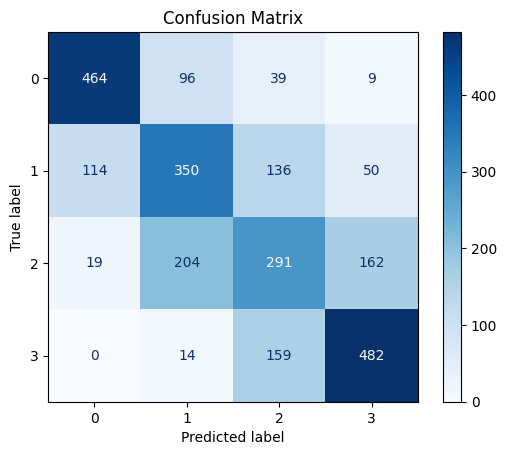

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Veri setini eğitim ve test olarak ayırıyoruz (%80 eğitim, %20 test)
scaler = StandardScaler() # StandardScaler nesnesi oluşturuluyor (veriyi standardize etmek için)
scaled_X_train = scaler.fit_transform(X_train) # Eğitim verisi üzerinde scaler'ı fit (ortalamayı ve std'yi öğren) ve transform (uygula)
scaled_X_test = scaler.transform(X_test) # Test verisine yalnızca transform uygulanıyor (eğitimdeki ölçekle)
log_model = LogisticRegressionCV() # Lojistik regresyon modeli oluşturuluyor (çapraz doğrulama destekli)
log_model.fit(scaled_X_train , y_train) # Model, eğitim verisiyle eğitiliyor
y_pred = log_model.predict(scaled_X_test) # Eğitilen model, test verisi üzerinde tahmin yapıyor

cm = confusion_matrix(y_test, y_pred) # Gerçek değerlerle tahminleri karşılaştırarak confusion matrix oluşturuluyor
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')  # Renk paleti opsiyoneldir
plt.title("Confusion Matrix")
plt.show()

In [7]:
print("Confusion Matrix:\n", cm)

correct_predictions = np.trace(cm)  # np.trace → köşegen elemanların toplamı
print("Doğru tahmin sayısı:", correct_predictions)

total_predictions = np.sum(cm)  # Matrisin tüm elemanlarının toplamı
print("Toplam tahmin sayısı:", total_predictions)

# Accuracy oranını hesapla
accuracy = correct_predictions / total_predictions
print("Accuracy (manuel hesaplama):", accuracy)

# Alternatif: sklearn fonksiyonu ile hesapla (kontrol amaçlı)
accuracy_builtin = accuracy_score(y_test, y_pred)
print("Accuracy (accuracy_score ile):", accuracy_builtin)

Confusion Matrix:
 [[464  96  39   9]
 [114 350 136  50]
 [ 19 204 291 162]
 [  0  14 159 482]]
Doğru tahmin sayısı: 1587
Toplam tahmin sayısı: 2589
Accuracy (manuel hesaplama): 0.6129779837775203
Accuracy (accuracy_score ile): 0.6129779837775203


In [8]:
X = scaler.transform(X)
y_hat = log_model.predict(X)
df['model_predection'] = y_hat
df

,age,gender,height,weight,body_fat,diastolic,systolic,grip_force,bend_forward,sit_ups,broad_jump,class,model_predection
0,27.0,1,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,2,4
1,25.0,1,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,4,3
2,31.0,1,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,2,2
3,32.0,1,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,3,3
4,28.0,1,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12940,39.0,1,174.4,70.80,24.3,78.0,132.0,41.6,12.0,44.0,168.0,3,2
12941,25.0,1,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,2,2
12942,21.0,1,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,1,2
12943,39.0,1,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,4,4


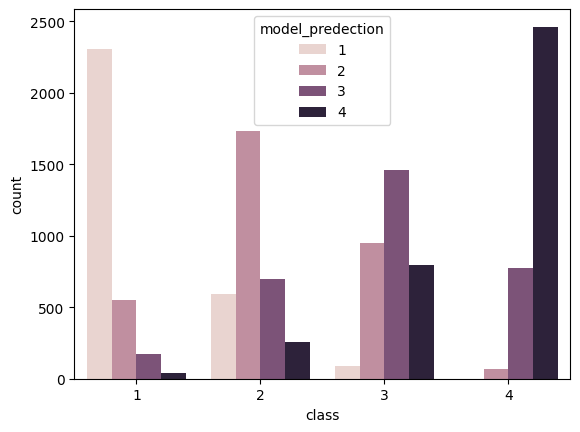

In [9]:
sns.countplot(data = df , x = 'class',hue = 'model_predection')
plt.savefig("logistic_regression_model_prediction.jpg", format="jpg", dpi=300)